In [1]:
from disp_agp_solver import Instance, DispAgpSolver, DispAgpSolverObserver
from typing import List, Tuple, Any
from pyvispoly import plot_polygon, Point, Polygon
import matplotlib.pyplot as plt
import os
import typing

In [2]:
from disp_agp_solver.sgdb import fetch

instance = fetch(
    "https://sbgdb.cs.sbg.ac.at/db/wip/polygons-with-holes/random/srpg_iso_mc/srpg_iso_mc0000311.graphml.xz"
)

Downloading: https://sbgdb.cs.sbg.ac.at/db/wip/polygons-with-holes/random/srpg_iso_mc/srpg_iso_mc0000311.graphml.xz
Parsing instance...
Parsed polygon with 314 points.


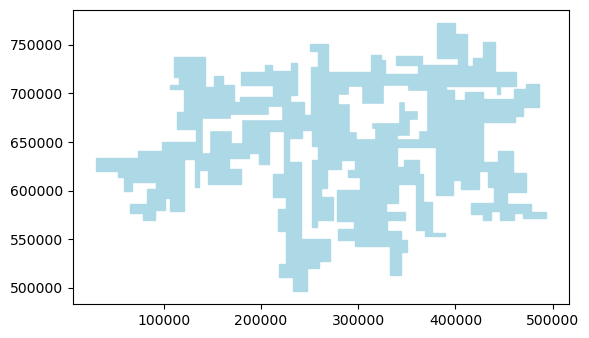

In [3]:
from pyvispoly import plot_polygon
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_aspect("equal")
plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
plt.show()

In [4]:
def plot_solution(ax, instance, objective, guards, witnesses, closest_pair, title=""):
    ax.set_aspect("equal")
    plt.title(title + "Objective: " + str(objective))
    plot_polygon(instance.as_cgal_polygon(), color="lightblue", ax=ax)
    for witness, covering_guards in witnesses:
        ax.plot([float(witness.x())], [float(witness.y())], "x", color="grey")
    for guard in guards:
        if guard not in closest_pair:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "bo",
            )
        else:
            ax.plot(
                [instance.positions[guard][0]],
                [instance.positions[guard][1]],
                "ro",
            )

In [5]:
# Plotting the solution process
class MyObserbver(DispAgpSolverObserver):
    def __init__(
        self, instance, save_to: typing.Optional[str] = None, filetype="pdf"
    ) -> None:
        super().__init__()
        self.instance = instance
        if save_to is not None:
            os.makedirs(save_to, exist_ok=True)
        self._save_to = save_to
        self.filetype = filetype
        self.i = 0
        self.last_solution = None

    def _save(self, name):
        if self._save_to is not None:
            # up to 3 digits
            plt.savefig(
                os.path.join(self._save_to, f"{self.i:03d}_{name}.{self.filetype}")
            )
        self.i += 1

    def on_coverage_iteration(
        self,
        guards: List[int],
        witnesses: List[Tuple[Any, List[int]]],
        missing_areas: List,
    ):
        fig, ax = plt.subplots()
        ax.set_aspect("equal")
        plt.title("Adding " + str(len(witnesses)) + " witnesses")
        plot_polygon(self.instance.as_cgal_polygon(), color="lightblue", ax=ax)
        for area in missing_areas:
            plot_polygon(area, color="red", ax=ax, alpha=0.3)
        for guard in guards:
            ax.plot(
                [self.instance.positions[guard][0]],
                [self.instance.positions[guard][1]],
                "bo",
            )
        for witness, covering_guards in witnesses:
            for covering_guard in covering_guards:
                ax.plot(
                    [self.instance.positions[covering_guard][0], float(witness.x())],
                    [self.instance.positions[covering_guard][1], float(witness.y())],
                    "r--",
                    lw=0.5,
                )
            ax.plot([float(witness.x())], [float(witness.y())], "x", color="darkred")
        self._save("coverage_iteration")
        plt.show()

    def on_new_solution(
        self,
        guards: List[int],
        objective: float,
        closest_pair: Tuple[int, int],
        witnesses: List[Tuple[Any, List[int]]],
    ):
        self.last_solution = (objective, guards, witnesses, closest_pair)
        fig, ax = plt.subplots()
        plot_solution(ax, self.instance, objective, guards, witnesses, closest_pair)
        self._save("new_solution")
        plt.show()

    def plot_last_solution(self, show=True):
        if self.last_solution is not None:
            fig, ax = plt.subplots()
            plot_solution(ax, self.instance, *self.last_solution, title="OPTIMAL - ")
            self._save("last_solution")
            if show:
                plt.show()

2023-11-24 16:00:24,674 Test
2023-11-24 16:00:24,679 Building basic model...
2023-11-24 16:00:25,245 Building basic full coverage model...
2023-11-24 16:00:25,246 Basic full coverage model built.
2023-11-24 16:00:25,247 Adding witnesses at vertices...
2023-11-24 16:00:25,250 Added coverage constraint for 11 vertices.
2023-11-24 16:00:25,252 Added coverage constraint for 7 vertices.
2023-11-24 16:00:25,255 Added coverage constraint for 10 vertices.
2023-11-24 16:00:25,257 Added coverage constraint for 7 vertices.
2023-11-24 16:00:25,262 Added coverage constraint for 5 vertices.
2023-11-24 16:00:25,265 Added coverage constraint for 13 vertices.
2023-11-24 16:00:25,268 Added coverage constraint for 17 vertices.
2023-11-24 16:00:25,271 Added coverage constraint for 8 vertices.
2023-11-24 16:00:25,275 Added coverage constraint for 8 vertices.
2023-11-24 16:00:25,278 Added coverage constraint for 12 vertices.
2023-11-24 16:00:25,281 Added coverage constraint for 11 vertices.
2023-11-24 16:00

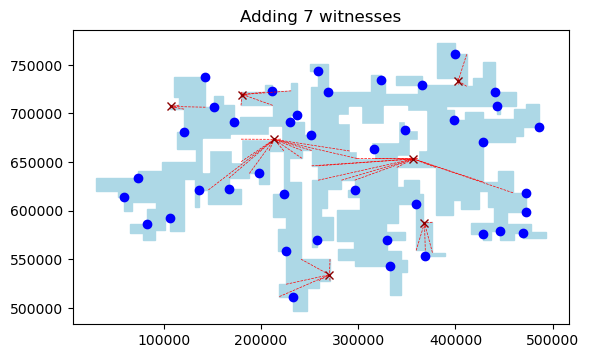

2023-11-24 16:00:29,080 Solving SAT-formula with timelimit 898.686566.
2023-11-24 16:00:29,081 SAT solver terminated (0.000000s).
2023-11-24 16:00:29,082 SAT-formula is satisfiable.
2023-11-24 16:00:29,083 Computing missing areas...
2023-11-24 16:00:29,675 Adding witnesses to missing areas...
2023-11-24 16:00:29,679 Added coverage constraint for 4 vertices.
2023-11-24 16:00:29,684 Added coverage constraint for 12 vertices.


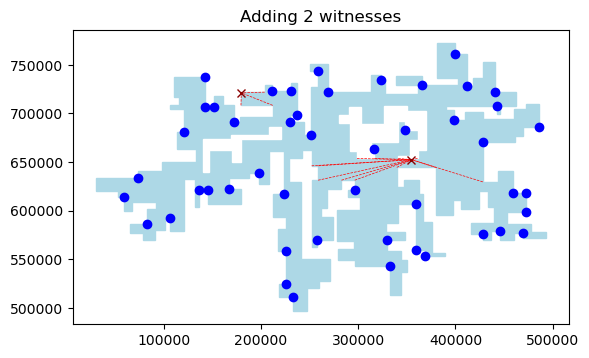

2023-11-24 16:00:30,260 Solving SAT-formula with timelimit 897.506955.
2023-11-24 16:00:30,261 SAT solver terminated (0.000000s).
2023-11-24 16:00:30,262 SAT-formula is satisfiable.
2023-11-24 16:00:30,263 Computing missing areas...
2023-11-24 16:00:30,698 Adding witnesses to missing areas...
2023-11-24 16:00:30,703 Added coverage constraint for 11 vertices.


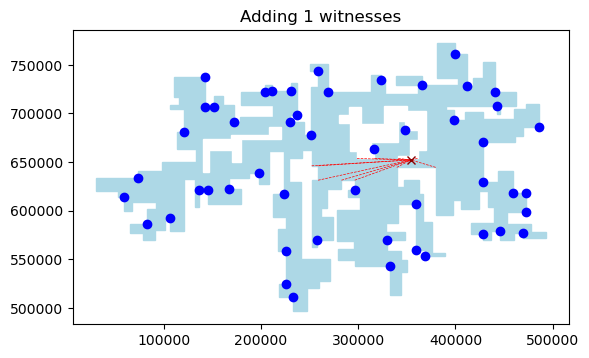

2023-11-24 16:00:31,163 Solving SAT-formula with timelimit 896.603341.
2023-11-24 16:00:31,164 SAT solver terminated (0.000000s).
2023-11-24 16:00:31,165 SAT-formula is satisfiable.
2023-11-24 16:00:31,166 Computing missing areas...


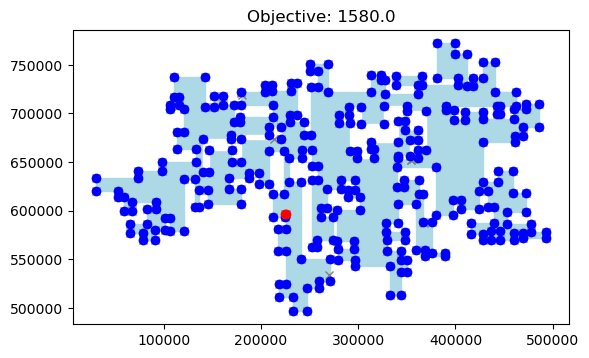

2023-11-24 16:00:32,941 Prohibited guard pair (171, 172).
2023-11-24 16:00:32,942 Prohibited guard pair (306, 307).
2023-11-24 16:00:32,943 Prohibited guard pair (170, 171).
2023-11-24 16:00:32,943 Prohibited guard pair (244, 245).
2023-11-24 16:00:32,944 Prohibited guard pair (45, 46).
2023-11-24 16:00:32,945 Prohibited guard pair (44, 47).
2023-11-24 16:00:32,946 Prohibited guard pair (151, 152).
2023-11-24 16:00:32,947 Prohibited guard pair (71, 72).
2023-11-24 16:00:32,947 Prohibited guard pair (295, 296).
2023-11-24 16:00:32,948 Prohibited guard pair (274, 275).
2023-11-24 16:00:32,949 Prohibited guard pair (249, 250).
2023-11-24 16:00:32,949 Prohibited guard pair (114, 115).
2023-11-24 16:00:32,950 Prohibited guard pair (199, 200).
2023-11-24 16:00:32,951 Prohibited guard pair (72, 73).
2023-11-24 16:00:32,952 Prohibited guard pair (170, 172).
2023-11-24 16:00:32,952 Prohibited guard pair (145, 146).
2023-11-24 16:00:32,953 Prohibited guard pair (160, 161).
2023-11-24 16:00:32,95

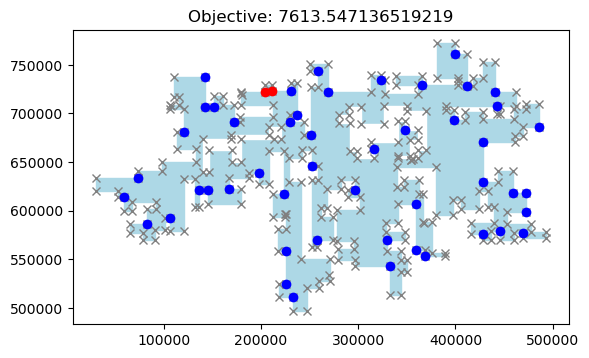

2023-11-24 16:00:34,660 Prohibited guard pair (79, 80).
2023-11-24 16:00:34,661 Prohibited guard pair (242, 246).
2023-11-24 16:00:34,662 Prohibited guard pair (296, 297).
2023-11-24 16:00:34,662 Prohibited guard pair (291, 292).
2023-11-24 16:00:34,663 Prohibited guard pair (234, 235).
2023-11-24 16:00:34,664 Prohibited guard pair (140, 141).
2023-11-24 16:00:34,664 Prohibited guard pair (90, 91).
2023-11-24 16:00:34,665 Prohibited guard pair (292, 293).
2023-11-24 16:00:34,666 Prohibited guard pair (253, 254).
2023-11-24 16:00:34,667 Prohibited guard pair (233, 236).
2023-11-24 16:00:34,668 Prohibited guard pair (27, 28).
2023-11-24 16:00:34,668 Prohibited guard pair (288, 289).
2023-11-24 16:00:34,669 Prohibited guard pair (38, 39).
2023-11-24 16:00:34,670 Prohibited guard pair (173, 174).
2023-11-24 16:00:34,670 Prohibited guard pair (175, 176).
2023-11-24 16:00:34,671 Prohibited guard pair (131, 132).
2023-11-24 16:00:34,672 Prohibited guard pair (83, 84).
2023-11-24 16:00:34,672 

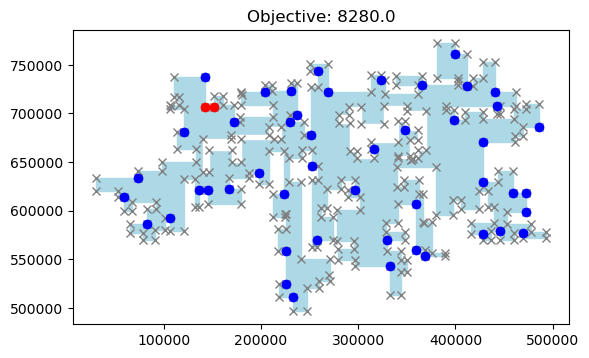

2023-11-24 16:00:36,169 Prohibited guard pair (303, 304).
2023-11-24 16:00:36,170 Prohibited guard pair (218, 219).
2023-11-24 16:00:36,171 Prohibited guard pair (199, 201).
2023-11-24 16:00:36,172 Prohibited guard pair (309, 310).
2023-11-24 16:00:36,172 Prohibited guard pair (308, 309).
2023-11-24 16:00:36,174 Prohibited guard pair (2, 5).
2023-11-24 16:00:36,175 Prohibited guard pair (46, 47).
2023-11-24 16:00:36,176 Prohibited guard pair (112, 113).
2023-11-24 16:00:36,177 Prohibited guard pair (295, 297).
2023-11-24 16:00:36,178 Prohibited guard pair (14, 15).
2023-11-24 16:00:36,179 Prohibited guard pair (10, 14).
2023-11-24 16:00:36,180 Prohibited guard pair (44, 45).
2023-11-24 16:00:36,181 Prohibited guard pair (6, 7).
2023-11-24 16:00:36,182 Prohibited guard pair (211, 214).
2023-11-24 16:00:36,182 Prohibited guard pair (260, 261).
2023-11-24 16:00:36,184 Prohibited guard pair (208, 209).
2023-11-24 16:00:36,185 Prohibited guard pair (4, 5).
2023-11-24 16:00:36,185 Prohibited

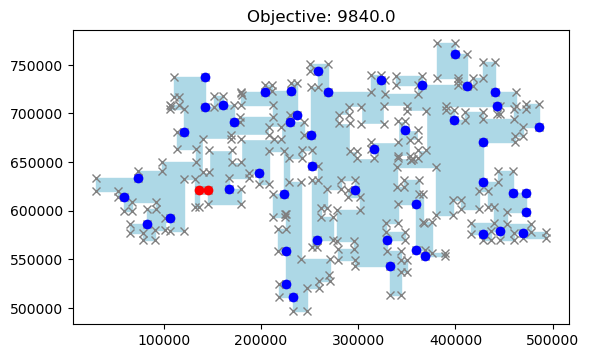

2023-11-24 16:00:37,647 Prohibited guard pair (302, 303).
2023-11-24 16:00:37,648 Prohibited guard pair (137, 140).
2023-11-24 16:00:37,649 Prohibited guard pair (24, 263).
2023-11-24 16:00:37,650 Prohibited guard pair (89, 91).
2023-11-24 16:00:37,651 Prohibited guard pair (105, 106).
2023-11-24 16:00:37,651 Prohibited guard pair (193, 194).
2023-11-24 16:00:37,652 Prohibited guard pair (40, 41).
2023-11-24 16:00:37,653 Prohibited guard pair (163, 164).
2023-11-24 16:00:37,654 Prohibited guard pair (161, 162).
2023-11-24 16:00:37,654 Prohibited guard pair (73, 74).
2023-11-24 16:00:37,655 Prohibited guard pair (104, 107).
2023-11-24 16:00:37,656 Prohibited guard pair (142, 143).
2023-11-24 16:00:37,657 Prohibited guard pair (53, 54).
2023-11-24 16:00:37,657 Prohibited guard pair (113, 115).
2023-11-24 16:00:37,658 Prohibited guard pair (210, 211).
2023-11-24 16:00:37,659 Prohibited guard pair (2, 4).
2023-11-24 16:00:37,659 Prohibited guard pair (143, 144).
2023-11-24 16:00:37,660 Pro

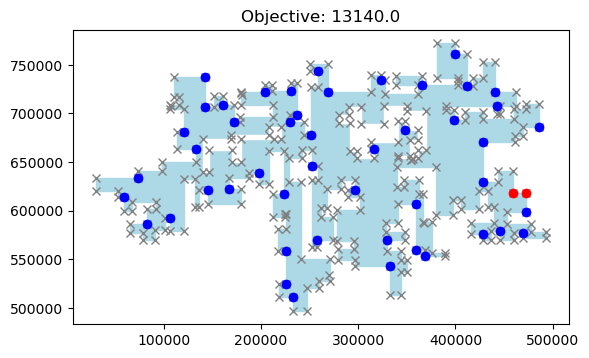

2023-11-24 16:00:39,672 Prohibited guard pair (77, 80).
2023-11-24 16:00:39,673 Prohibited guard pair (84, 85).
2023-11-24 16:00:39,674 Prohibited guard pair (286, 288).
2023-11-24 16:00:39,675 Prohibited guard pair (294, 296).
2023-11-24 16:00:39,675 Prohibited guard pair (301, 302).
2023-11-24 16:00:39,676 Prohibited guard pair (40, 42).
2023-11-24 16:00:39,677 Prohibited guard pair (228, 230).
2023-11-24 16:00:39,678 Prohibited guard pair (126, 127).
2023-11-24 16:00:39,679 Prohibited guard pair (179, 180).
2023-11-24 16:00:39,679 Prohibited guard pair (146, 147).
2023-11-24 16:00:39,680 Prohibited guard pair (111, 113).
2023-11-24 16:00:39,680 Prohibited guard pair (96, 97).
2023-11-24 16:00:39,681 Prohibited guard pair (85, 86).
2023-11-24 16:00:39,682 Prohibited guard pair (209, 210).
2023-11-24 16:00:39,682 Prohibited guard pair (227, 229).
2023-11-24 16:00:39,683 Prohibited guard pair (53, 55).
2023-11-24 16:00:39,684 Prohibited guard pair (41, 43).
2023-11-24 16:00:39,685 Proh

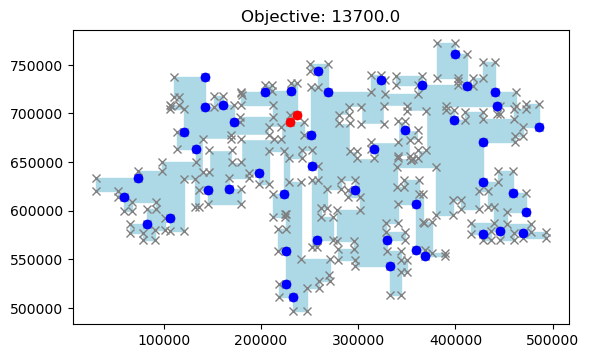

2023-11-24 16:00:41,267 Prohibited guard pair (112, 116).
2023-11-24 16:00:41,268 Prohibited guard pair (135, 145).
2023-11-24 16:00:41,269 Prohibited guard pair (23, 264).
2023-11-24 16:00:41,269 Prohibited guard pair (16, 267).
2023-11-24 16:00:41,270 Prohibited guard pair (298, 301).
2023-11-24 16:00:41,271 Prohibited guard pair (231, 232).
2023-11-24 16:00:41,272 Prohibited guard pair (169, 172).
2023-11-24 16:00:41,272 Prohibited guard pair (214, 215).
2023-11-24 16:00:41,274 Prohibited guard pair (104, 106).
2023-11-24 16:00:41,275 Prohibited guard pair (167, 190).
2023-11-24 16:00:41,275 Prohibited guard pair (31, 33).
2023-11-24 16:00:41,276 Prohibited guard pair (7, 8).
2023-11-24 16:00:41,277 Prohibited guard pair (298, 306).
2023-11-24 16:00:41,278 Prohibited guard pair (102, 274).
2023-11-24 16:00:41,278 Prohibited guard pair (70, 75).
2023-11-24 16:00:41,279 Prohibited guard pair (6, 9).
2023-11-24 16:00:41,281 Prohibited guard pair (177, 180).
2023-11-24 16:00:41,282 Solv

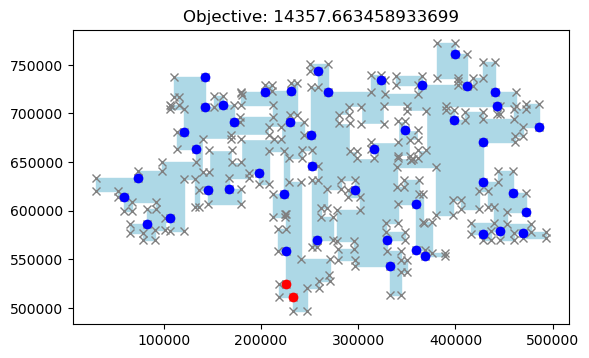

2023-11-24 16:00:42,719 Prohibited guard pair (183, 185).
2023-11-24 16:00:42,720 Prohibited guard pair (250, 251).
2023-11-24 16:00:42,721 Prohibited guard pair (212, 214).
2023-11-24 16:00:42,721 Prohibited guard pair (17, 266).
2023-11-24 16:00:42,722 Prohibited guard pair (48, 49).
2023-11-24 16:00:42,723 Prohibited guard pair (177, 179).
2023-11-24 16:00:42,724 Prohibited guard pair (44, 50).
2023-11-24 16:00:42,725 Solving SAT-formula with timelimit 14.958085.
2023-11-24 16:00:42,726 SAT solver terminated (0.000000s).
2023-11-24 16:00:42,727 SAT-formula is satisfiable.
2023-11-24 16:00:42,728 Computing missing areas...


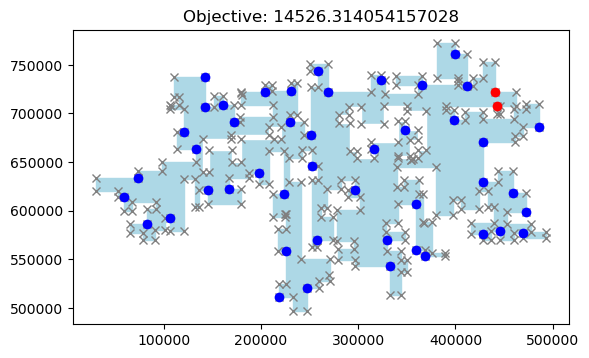

2023-11-24 16:00:44,479 Prohibited guard pair (115, 116).
2023-11-24 16:00:44,480 Prohibited guard pair (140, 142).
2023-11-24 16:00:44,481 Prohibited guard pair (130, 131).
2023-11-24 16:00:44,482 Prohibited guard pair (26, 28).
2023-11-24 16:00:44,484 Prohibited guard pair (9, 11).
2023-11-24 16:00:44,484 Prohibited guard pair (180, 181).
2023-11-24 16:00:44,485 Prohibited guard pair (154, 155).
2023-11-24 16:00:44,488 Prohibited guard pair (252, 254).
2023-11-24 16:00:44,491 Prohibited guard pair (161, 268).
2023-11-24 16:00:44,494 Prohibited guard pair (196, 197).
2023-11-24 16:00:44,496 Prohibited guard pair (160, 162).
2023-11-24 16:00:44,498 Prohibited guard pair (241, 243).
2023-11-24 16:00:44,500 Solving SAT-formula with timelimit 16.733892.
2023-11-24 16:00:44,503 SAT solver terminated (0.000000s).
2023-11-24 16:00:44,507 SAT-formula is satisfiable.
2023-11-24 16:00:44,509 Computing missing areas...


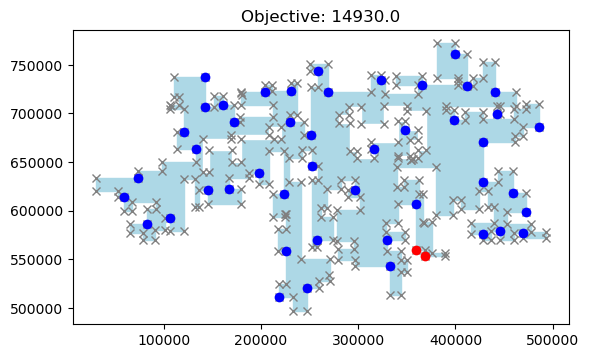

2023-11-24 16:00:46,164 Prohibited guard pair (207, 208).
2023-11-24 16:00:46,165 Prohibited guard pair (71, 74).
2023-11-24 16:00:46,168 Prohibited guard pair (92, 98).
2023-11-24 16:00:46,169 Prohibited guard pair (87, 271).
2023-11-24 16:00:46,170 Prohibited guard pair (70, 71).
2023-11-24 16:00:46,172 Prohibited guard pair (162, 164).
2023-11-24 16:00:46,174 Prohibited guard pair (181, 182).
2023-11-24 16:00:46,176 Prohibited guard pair (147, 148).
2023-11-24 16:00:46,178 Prohibited guard pair (114, 116).
2023-11-24 16:00:46,179 Prohibited guard pair (165, 166).
2023-11-24 16:00:46,179 Prohibited guard pair (305, 307).
2023-11-24 16:00:46,181 Prohibited guard pair (204, 206).
2023-11-24 16:00:46,182 Prohibited guard pair (258, 259).
2023-11-24 16:00:46,182 Prohibited guard pair (191, 193).
2023-11-24 16:00:46,183 Prohibited guard pair (156, 157).
2023-11-24 16:00:46,184 Prohibited guard pair (21, 22).
2023-11-24 16:00:46,188 Prohibited guard pair (47, 50).
2023-11-24 16:00:46,193 P

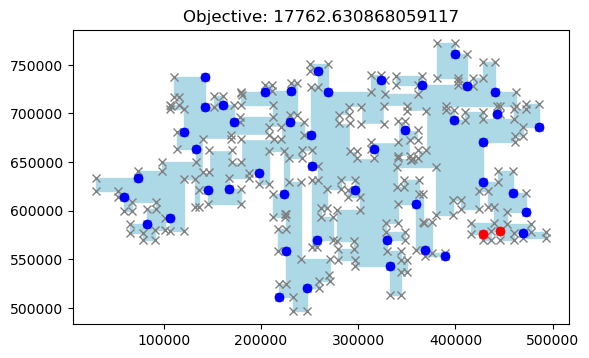

2023-11-24 16:00:48,117 Prohibited guard pair (4, 267).
2023-11-24 16:00:48,118 Prohibited guard pair (8, 16).
2023-11-24 16:00:48,118 Prohibited guard pair (233, 234).
2023-11-24 16:00:48,119 Prohibited guard pair (259, 261).
2023-11-24 16:00:48,120 Prohibited guard pair (59, 60).
2023-11-24 16:00:48,121 Prohibited guard pair (5, 7).
2023-11-24 16:00:48,121 Prohibited guard pair (7, 16).
2023-11-24 16:00:48,122 Prohibited guard pair (210, 214).
2023-11-24 16:00:48,123 Prohibited guard pair (9, 14).
2023-11-24 16:00:48,124 Prohibited guard pair (17, 267).
2023-11-24 16:00:48,124 Prohibited guard pair (192, 194).
2023-11-24 16:00:48,125 Prohibited guard pair (294, 297).
2023-11-24 16:00:48,125 Prohibited guard pair (135, 137).
2023-11-24 16:00:48,127 Prohibited guard pair (217, 218).
2023-11-24 16:00:48,127 Prohibited guard pair (4, 6).
2023-11-24 16:00:48,128 Prohibited guard pair (102, 275).
2023-11-24 16:00:48,128 Prohibited guard pair (151, 153).
2023-11-24 16:00:48,129 Prohibited g

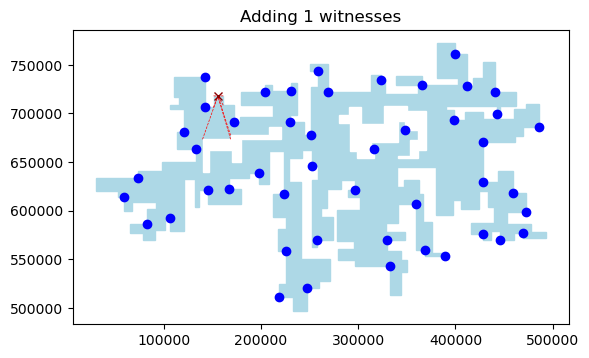

2023-11-24 16:00:49,215 Solving SAT-formula with timelimit 19.384180.
2023-11-24 16:00:49,216 SAT solver terminated (0.000000s).
2023-11-24 16:00:49,217 SAT-formula is satisfiable.
2023-11-24 16:00:49,218 Computing missing areas...


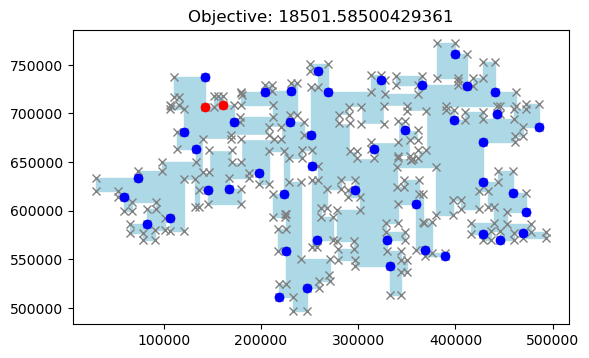

2023-11-24 16:00:50,738 Prohibited guard pair (166, 193).
2023-11-24 16:00:50,739 Prohibited guard pair (77, 78).
2023-11-24 16:00:50,741 Prohibited guard pair (178, 180).
2023-11-24 16:00:50,741 Prohibited guard pair (111, 116).
2023-11-24 16:00:50,742 Prohibited guard pair (55, 62).
2023-11-24 16:00:50,743 Prohibited guard pair (298, 305).
2023-11-24 16:00:50,743 Prohibited guard pair (75, 285).
2023-11-24 16:00:50,744 Prohibited guard pair (137, 142).
2023-11-24 16:00:50,745 Prohibited guard pair (154, 278).
2023-11-24 16:00:50,746 Prohibited guard pair (160, 268).
2023-11-24 16:00:50,747 Prohibited guard pair (28, 35).
2023-11-24 16:00:50,748 Prohibited guard pair (86, 99).
2023-11-24 16:00:50,749 Prohibited guard pair (26, 29).
2023-11-24 16:00:50,750 Prohibited guard pair (21, 23).
2023-11-24 16:00:50,750 Prohibited guard pair (232, 236).
2023-11-24 16:00:50,752 Prohibited guard pair (84, 86).
2023-11-24 16:00:50,753 Prohibited guard pair (71, 75).
2023-11-24 16:00:50,758 Prohibi

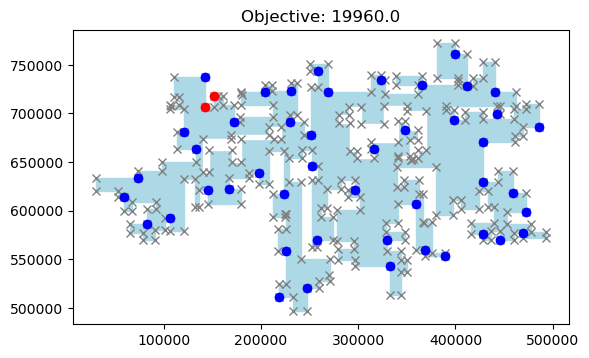

2023-11-24 16:00:52,164 Prohibited guard pair (210, 213).
2023-11-24 16:00:52,165 Prohibited guard pair (77, 79).
2023-11-24 16:00:52,166 Prohibited guard pair (29, 34).
2023-11-24 16:00:52,167 Prohibited guard pair (167, 171).
2023-11-24 16:00:52,168 Prohibited guard pair (73, 75).
2023-11-24 16:00:52,170 Prohibited guard pair (65, 69).
2023-11-24 16:00:52,171 Prohibited guard pair (240, 248).
2023-11-24 16:00:52,174 Prohibited guard pair (166, 192).
2023-11-24 16:00:52,179 Prohibited guard pair (149, 277).
2023-11-24 16:00:52,181 Prohibited guard pair (167, 172).
2023-11-24 16:00:52,184 Prohibited guard pair (243, 245).
2023-11-24 16:00:52,185 Prohibited guard pair (304, 306).
2023-11-24 16:00:52,187 Prohibited guard pair (85, 87).
2023-11-24 16:00:52,192 Prohibited guard pair (260, 262).
2023-11-24 16:00:52,193 Prohibited guard pair (53, 56).
2023-11-24 16:00:52,195 Prohibited guard pair (102, 104).
2023-11-24 16:00:52,195 Prohibited guard pair (170, 173).
2023-11-24 16:00:52,197 Pr

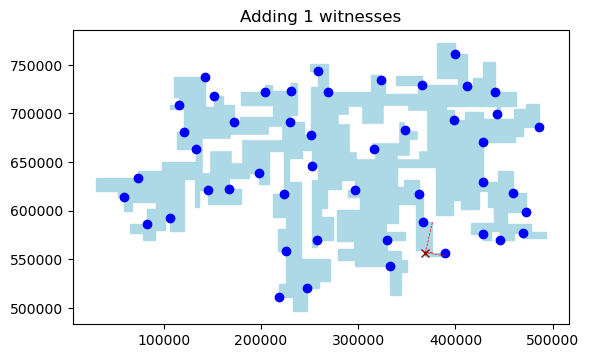

2023-11-24 16:00:53,110 Solving SAT-formula with timelimit 23.583184.
2023-11-24 16:00:53,111 SAT solver terminated (0.000000s).
2023-11-24 16:00:53,112 SAT-formula is satisfiable.
2023-11-24 16:00:53,113 Computing missing areas...


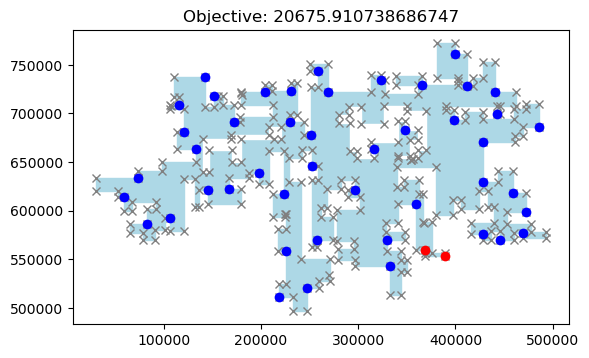

2023-11-24 16:00:54,719 Prohibited guard pair (142, 144).
2023-11-24 16:00:54,720 Prohibited guard pair (103, 107).
2023-11-24 16:00:54,721 Prohibited guard pair (139, 141).
2023-11-24 16:00:54,721 Prohibited guard pair (298, 303).
2023-11-24 16:00:54,722 Prohibited guard pair (69, 312).
2023-11-24 16:00:54,723 Prohibited guard pair (256, 308).
2023-11-24 16:00:54,724 Prohibited guard pair (37, 39).
2023-11-24 16:00:54,725 Prohibited guard pair (159, 268).
2023-11-24 16:00:54,725 Prohibited guard pair (143, 146).
2023-11-24 16:00:54,726 Prohibited guard pair (234, 236).
2023-11-24 16:00:54,727 Prohibited guard pair (87, 98).
2023-11-24 16:00:54,727 Prohibited guard pair (285, 287).
2023-11-24 16:00:54,728 Prohibited guard pair (159, 160).
2023-11-24 16:00:54,728 Prohibited guard pair (1, 5).
2023-11-24 16:00:54,729 Prohibited guard pair (203, 205).
2023-11-24 16:00:54,730 Prohibited guard pair (268, 280).
2023-11-24 16:00:54,730 Prohibited guard pair (101, 275).
2023-11-24 16:00:54,731

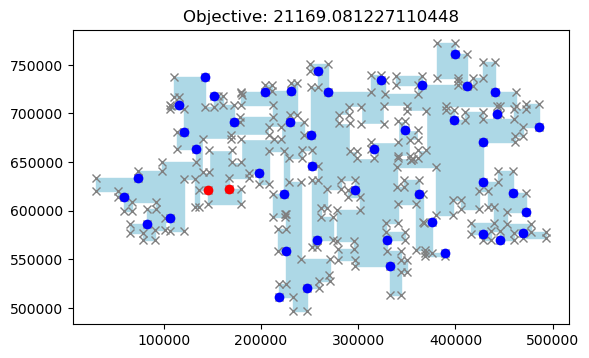

2023-11-24 16:00:56,058 Prohibited guard pair (298, 299).
2023-11-24 16:00:56,059 Prohibited guard pair (286, 289).
2023-11-24 16:00:56,060 Prohibited guard pair (58, 60).
2023-11-24 16:00:56,061 Prohibited guard pair (110, 112).
2023-11-24 16:00:56,061 Prohibited guard pair (129, 131).
2023-11-24 16:00:56,062 Prohibited guard pair (8, 11).
2023-11-24 16:00:56,063 Prohibited guard pair (3, 6).
2023-11-24 16:00:56,063 Prohibited guard pair (43, 311).
2023-11-24 16:00:56,064 Prohibited guard pair (161, 163).
2023-11-24 16:00:56,064 Prohibited guard pair (191, 270).
2023-11-24 16:00:56,065 Prohibited guard pair (159, 161).
2023-11-24 16:00:56,066 Prohibited guard pair (61, 62).
2023-11-24 16:00:56,067 Prohibited guard pair (6, 17).
2023-11-24 16:00:56,067 Prohibited guard pair (195, 197).
2023-11-24 16:00:56,068 Prohibited guard pair (161, 281).
2023-11-24 16:00:56,069 Prohibited guard pair (23, 263).
2023-11-24 16:00:56,069 Prohibited guard pair (153, 278).
2023-11-24 16:00:56,070 Prohib

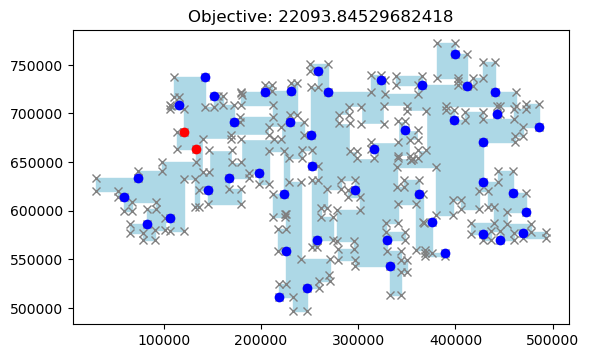

2023-11-24 16:00:57,491 Prohibited guard pair (177, 183).
2023-11-24 16:00:57,492 Prohibited guard pair (88, 271).
2023-11-24 16:00:57,493 Prohibited guard pair (108, 116).
2023-11-24 16:00:57,494 Prohibited guard pair (20, 21).
2023-11-24 16:00:57,494 Prohibited guard pair (100, 274).
2023-11-24 16:00:57,495 Prohibited guard pair (135, 143).
2023-11-24 16:00:57,496 Prohibited guard pair (174, 175).
2023-11-24 16:00:57,497 Prohibited guard pair (173, 176).
2023-11-24 16:00:57,497 Prohibited guard pair (30, 33).
2023-11-24 16:00:57,498 Prohibited guard pair (162, 268).
2023-11-24 16:00:57,499 Prohibited guard pair (47, 49).
2023-11-24 16:00:57,500 Prohibited guard pair (236, 238).
2023-11-24 16:00:57,500 Prohibited guard pair (67, 68).
2023-11-24 16:00:57,501 Prohibited guard pair (298, 300).
2023-11-24 16:00:57,501 Prohibited guard pair (210, 293).
2023-11-24 16:00:57,502 Prohibited guard pair (208, 210).
2023-11-24 16:00:57,503 Prohibited guard pair (0, 5).
2023-11-24 16:00:57,503 Pro

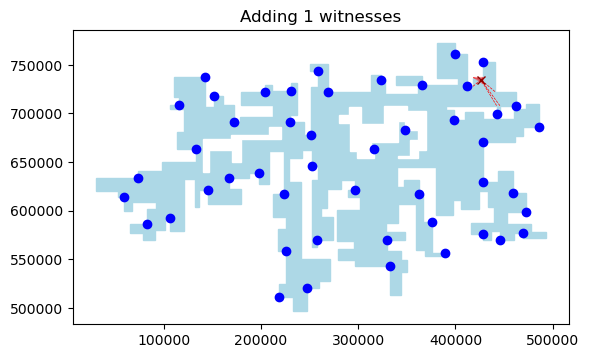

2023-11-24 16:00:58,362 Solving SAT-formula with timelimit 28.971310.
2023-11-24 16:00:58,364 SAT solver terminated (0.000000s).
2023-11-24 16:00:58,365 SAT-formula is satisfiable.
2023-11-24 16:00:58,366 Computing missing areas...


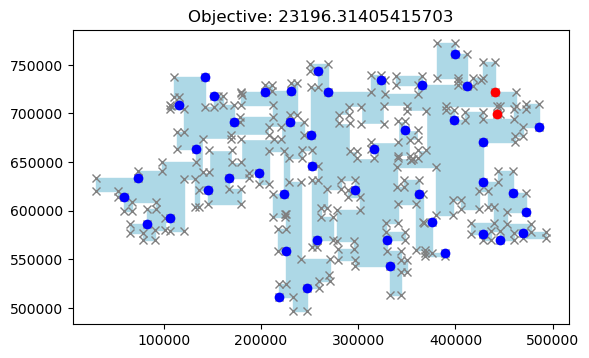

2023-11-24 16:00:59,660 Prohibited guard pair (50, 55).
2023-11-24 16:00:59,661 Prohibited guard pair (255, 308).
2023-11-24 16:00:59,661 Prohibited guard pair (279, 280).
2023-11-24 16:00:59,662 Prohibited guard pair (9, 267).
2023-11-24 16:00:59,663 Prohibited guard pair (30, 31).
2023-11-24 16:00:59,664 Prohibited guard pair (129, 132).
2023-11-24 16:00:59,665 Prohibited guard pair (228, 231).
2023-11-24 16:00:59,666 Prohibited guard pair (168, 171).
2023-11-24 16:00:59,667 Prohibited guard pair (282, 313).
2023-11-24 16:00:59,667 Prohibited guard pair (221, 223).
2023-11-24 16:00:59,668 Prohibited guard pair (18, 20).
2023-11-24 16:00:59,669 Solving SAT-formula with timelimit 31.902061.
2023-11-24 16:00:59,670 SAT solver terminated (0.000000s).
2023-11-24 16:00:59,671 SAT-formula is satisfiable.
2023-11-24 16:00:59,671 Computing missing areas...


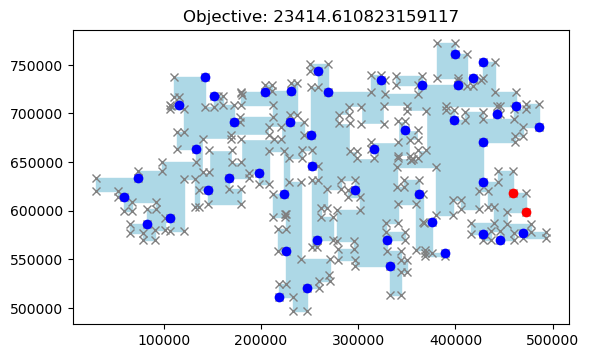

2023-11-24 16:01:01,017 Prohibited guard pair (98, 271).
2023-11-24 16:01:01,018 Prohibited guard pair (200, 202).
2023-11-24 16:01:01,018 Prohibited guard pair (5, 9).
2023-11-24 16:01:01,019 Prohibited guard pair (25, 36).
2023-11-24 16:01:01,019 Prohibited guard pair (26, 35).
2023-11-24 16:01:01,020 Prohibited guard pair (0, 267).
2023-11-24 16:01:01,021 Prohibited guard pair (138, 141).
2023-11-24 16:01:01,021 Prohibited guard pair (29, 32).
2023-11-24 16:01:01,022 Prohibited guard pair (173, 175).
2023-11-24 16:01:01,023 Prohibited guard pair (6, 10).
2023-11-24 16:01:01,023 Prohibited guard pair (237, 239).
2023-11-24 16:01:01,024 Prohibited guard pair (174, 176).
2023-11-24 16:01:01,025 Prohibited guard pair (57, 59).
2023-11-24 16:01:01,026 Prohibited guard pair (172, 174).
2023-11-24 16:01:01,026 Prohibited guard pair (157, 159).
2023-11-24 16:01:01,027 Prohibited guard pair (46, 50).
2023-11-24 16:01:01,027 Prohibited guard pair (105, 108).
2023-11-24 16:01:01,028 Prohibited

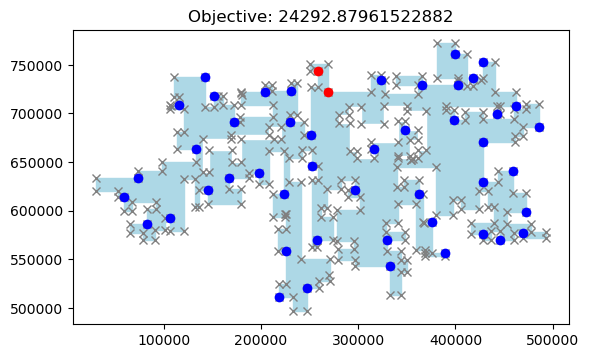

2023-11-24 16:01:02,455 Prohibited guard pair (137, 146).
2023-11-24 16:01:02,456 Solving SAT-formula with timelimit 34.688995.
2023-11-24 16:01:02,457 SAT solver terminated (0.000000s).
2023-11-24 16:01:02,458 SAT-formula is satisfiable.
2023-11-24 16:01:02,459 Computing missing areas...


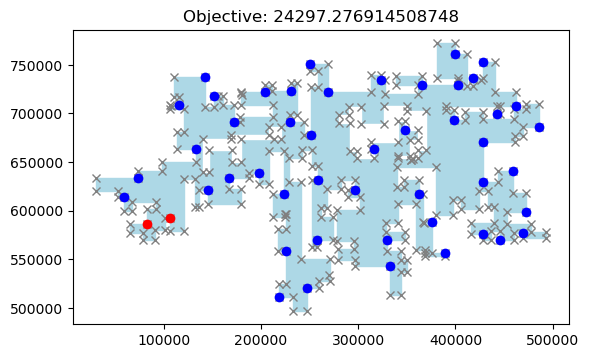

2023-11-24 16:01:03,758 Prohibited guard pair (125, 130).
2023-11-24 16:01:03,759 Solving SAT-formula with timelimit 35.992700.
2023-11-24 16:01:03,761 SAT solver terminated (0.000000s).
2023-11-24 16:01:03,762 SAT-formula is satisfiable.
2023-11-24 16:01:03,762 Computing missing areas...


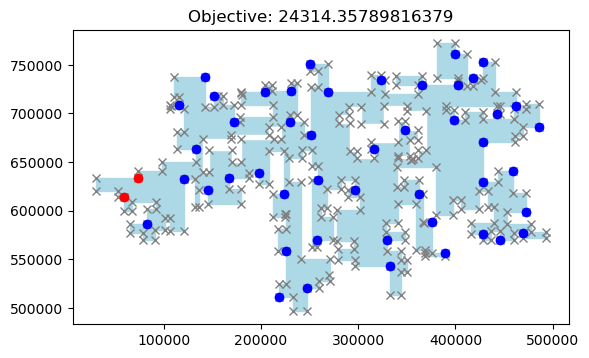

2023-11-24 16:01:05,099 Prohibited guard pair (258, 260).
2023-11-24 16:01:05,100 Prohibited guard pair (250, 254).
2023-11-24 16:01:05,100 Prohibited guard pair (95, 96).
2023-11-24 16:01:05,101 Prohibited guard pair (303, 305).
2023-11-24 16:01:05,102 Prohibited guard pair (84, 192).
2023-11-24 16:01:05,103 Prohibited guard pair (215, 216).
2023-11-24 16:01:05,103 Prohibited guard pair (66, 68).
2023-11-24 16:01:05,104 Prohibited guard pair (193, 270).
2023-11-24 16:01:05,105 Prohibited guard pair (154, 159).
2023-11-24 16:01:05,106 Solving SAT-formula with timelimit 37.339168.
2023-11-24 16:01:05,107 SAT solver terminated (0.000000s).
2023-11-24 16:01:05,108 SAT-formula is satisfiable.
2023-11-24 16:01:05,109 Computing missing areas...
2023-11-24 16:01:05,516 Adding witnesses to missing areas...
2023-11-24 16:01:05,521 Added coverage constraint for 9 vertices.
2023-11-24 16:01:05,524 Added coverage constraint for 9 vertices.


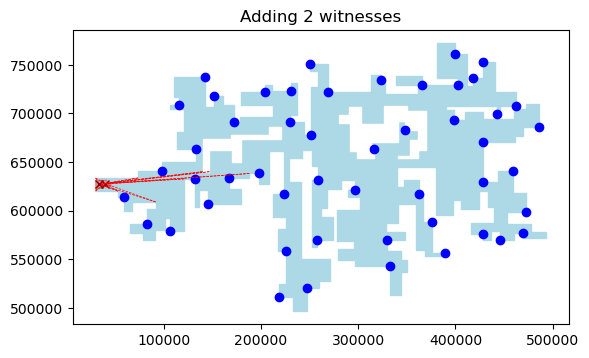

2023-11-24 16:01:05,940 Solving SAT-formula with timelimit 36.504640.
2023-11-24 16:01:05,942 SAT solver terminated (0.000000s).
2023-11-24 16:01:05,942 SAT-formula is satisfiable.
2023-11-24 16:01:05,943 Computing missing areas...


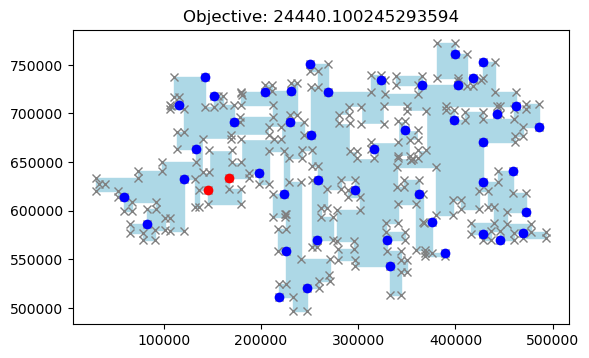

2023-11-24 16:01:07,214 Prohibited guard pair (160, 281).
2023-11-24 16:01:07,215 Prohibited guard pair (9, 17).
2023-11-24 16:01:07,216 Prohibited guard pair (255, 305).
2023-11-24 16:01:07,217 Prohibited guard pair (294, 307).
2023-11-24 16:01:07,218 Prohibited guard pair (240, 251).
2023-11-24 16:01:07,218 Prohibited guard pair (54, 63).
2023-11-24 16:01:07,219 Solving SAT-formula with timelimit 39.452472.
2023-11-24 16:01:07,220 SAT solver terminated (0.000000s).
2023-11-24 16:01:07,221 SAT-formula is satisfiable.
2023-11-24 16:01:07,222 Computing missing areas...


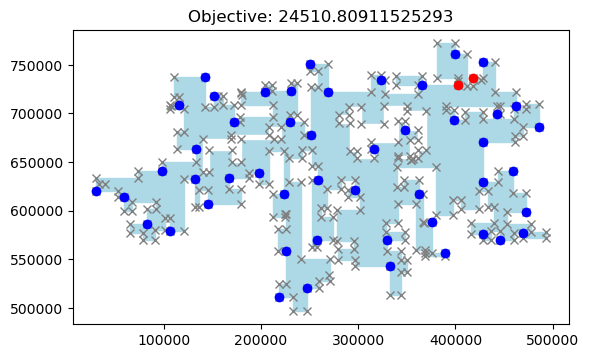

2023-11-24 16:01:08,598 Prohibited guard pair (103, 106).
2023-11-24 16:01:08,598 Prohibited guard pair (123, 124).
2023-11-24 16:01:08,599 Prohibited guard pair (153, 155).
2023-11-24 16:01:08,600 Prohibited guard pair (8, 14).
2023-11-24 16:01:08,601 Prohibited guard pair (165, 191).
2023-11-24 16:01:08,601 Prohibited guard pair (218, 220).
2023-11-24 16:01:08,602 Prohibited guard pair (10, 12).
2023-11-24 16:01:08,603 Prohibited guard pair (294, 306).
2023-11-24 16:01:08,604 Prohibited guard pair (84, 271).
2023-11-24 16:01:08,604 Prohibited guard pair (199, 202).
2023-11-24 16:01:08,605 Prohibited guard pair (58, 62).
2023-11-24 16:01:08,606 Prohibited guard pair (22, 264).
2023-11-24 16:01:08,606 Prohibited guard pair (251, 254).
2023-11-24 16:01:08,607 Prohibited guard pair (20, 266).
2023-11-24 16:01:08,608 Prohibited guard pair (15, 16).
2023-11-24 16:01:08,609 Prohibited guard pair (185, 187).
2023-11-24 16:01:08,609 Prohibited guard pair (86, 98).
2023-11-24 16:01:08,610 Proh

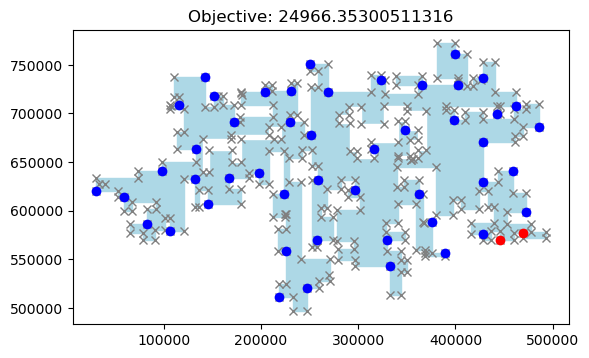

2023-11-24 16:01:09,984 Prohibited guard pair (231, 233).
2023-11-24 16:01:09,985 Prohibited guard pair (43, 63).
2023-11-24 16:01:09,986 Prohibited guard pair (166, 271).
2023-11-24 16:01:09,987 Prohibited guard pair (168, 190).
2023-11-24 16:01:09,987 Prohibited guard pair (249, 252).
2023-11-24 16:01:09,988 Prohibited guard pair (87, 272).
2023-11-24 16:01:09,992 Prohibited guard pair (171, 174).
2023-11-24 16:01:09,993 Prohibited guard pair (161, 164).
2023-11-24 16:01:09,994 Prohibited guard pair (70, 313).
2023-11-24 16:01:09,996 Prohibited guard pair (299, 302).
2023-11-24 16:01:09,998 Prohibited guard pair (136, 146).
2023-11-24 16:01:09,999 Prohibited guard pair (87, 91).
2023-11-24 16:01:10,004 Prohibited guard pair (196, 207).
2023-11-24 16:01:10,006 Prohibited guard pair (239, 252).
2023-11-24 16:01:10,007 Prohibited guard pair (191, 194).
2023-11-24 16:01:10,009 Prohibited guard pair (295, 306).
2023-11-24 16:01:10,010 Prohibited guard pair (88, 99).
2023-11-24 16:01:10,01

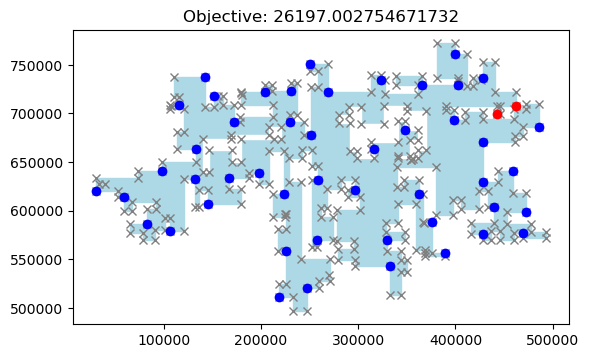

2023-11-24 16:01:11,568 Prohibited guard pair (295, 307).
2023-11-24 16:01:11,569 Prohibited guard pair (87, 270).
2023-11-24 16:01:11,569 Prohibited guard pair (76, 286).
2023-11-24 16:01:11,570 Prohibited guard pair (14, 16).
2023-11-24 16:01:11,571 Prohibited guard pair (255, 298).
2023-11-24 16:01:11,572 Prohibited guard pair (68, 313).
2023-11-24 16:01:11,572 Prohibited guard pair (84, 166).
2023-11-24 16:01:11,573 Prohibited guard pair (240, 254).
2023-11-24 16:01:11,574 Prohibited guard pair (301, 305).
2023-11-24 16:01:11,574 Prohibited guard pair (263, 265).
2023-11-24 16:01:11,575 Prohibited guard pair (48, 50).
2023-11-24 16:01:11,576 Prohibited guard pair (141, 144).
2023-11-24 16:01:11,576 Prohibited guard pair (202, 204).
2023-11-24 16:01:11,577 Prohibited guard pair (217, 219).
2023-11-24 16:01:11,578 Prohibited guard pair (2, 7).
2023-11-24 16:01:11,578 Prohibited guard pair (52, 54).
2023-11-24 16:01:11,579 Prohibited guard pair (142, 145).
2023-11-24 16:01:11,580 Proh

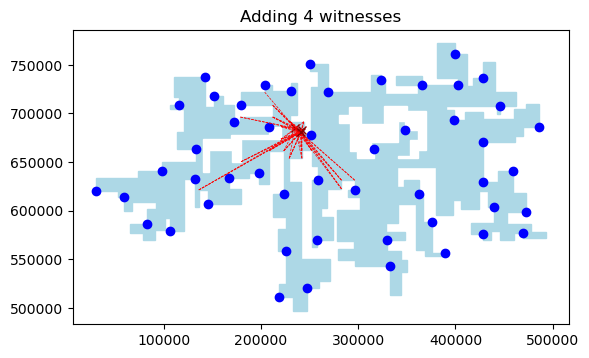

2023-11-24 16:01:12,557 Solving SAT-formula with timelimit 42.861572.
2023-11-24 16:01:12,558 SAT solver terminated (0.000000s).
2023-11-24 16:01:12,559 SAT-formula is satisfiable.
2023-11-24 16:01:12,560 Computing missing areas...
2023-11-24 16:01:13,043 Adding witnesses to missing areas...
2023-11-24 16:01:13,049 Added coverage constraint for 22 vertices.
2023-11-24 16:01:13,053 Added coverage constraint for 11 vertices.


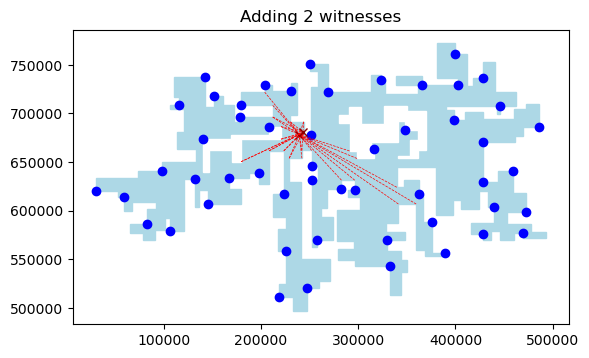

2023-11-24 16:01:13,609 Solving SAT-formula with timelimit 41.810017.
2023-11-24 16:01:13,610 SAT solver terminated (0.000000s).
2023-11-24 16:01:13,611 SAT-formula is satisfiable.
2023-11-24 16:01:13,612 Computing missing areas...


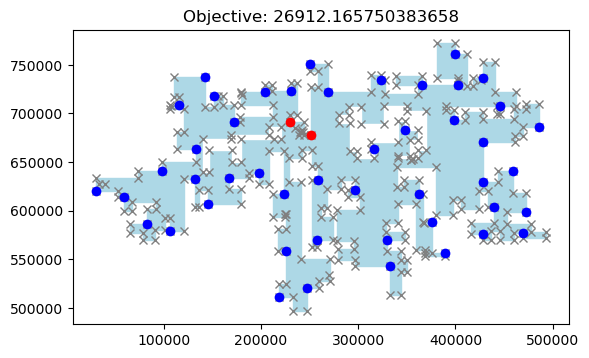

2023-11-24 16:01:15,349 Prohibited guard pair (78, 81).
2023-11-24 16:01:15,351 Prohibited guard pair (20, 22).
2023-11-24 16:01:15,352 Prohibited guard pair (92, 99).
2023-11-24 16:01:15,353 Prohibited guard pair (83, 192).
2023-11-24 16:01:15,353 Prohibited guard pair (224, 233).
2023-11-24 16:01:15,354 Solving SAT-formula with timelimit 47.587348.
2023-11-24 16:01:15,355 SAT solver terminated (0.000000s).
2023-11-24 16:01:15,356 SAT-formula is satisfiable.
2023-11-24 16:01:15,356 Computing missing areas...
2023-11-24 16:01:15,944 Adding witnesses to missing areas...
2023-11-24 16:01:15,948 Added coverage constraint for 10 vertices.


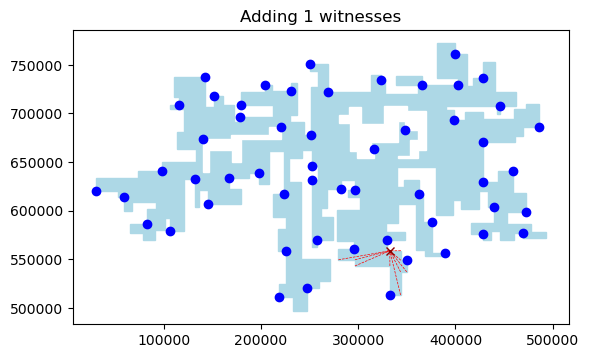

2023-11-24 16:01:16,435 Solving SAT-formula with timelimit 46.505795.
2023-11-24 16:01:16,439 SAT solver terminated (0.000000s).
2023-11-24 16:01:16,442 SAT-formula is satisfiable.
2023-11-24 16:01:16,445 Computing missing areas...


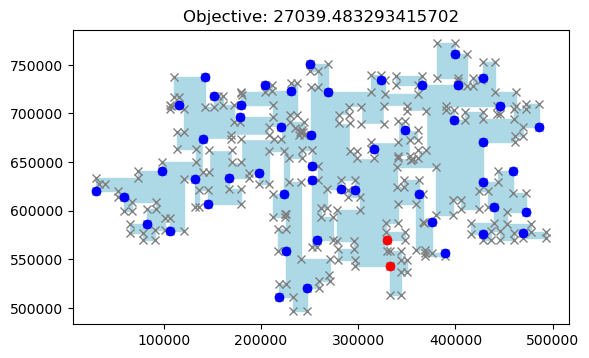

2023-11-24 16:01:18,373 Prohibited guard pair (118, 120).
2023-11-24 16:01:18,374 Prohibited guard pair (158, 278).
2023-11-24 16:01:18,374 Prohibited guard pair (4, 16).
2023-11-24 16:01:18,375 Prohibited guard pair (8, 15).
2023-11-24 16:01:18,376 Prohibited guard pair (0, 4).
2023-11-24 16:01:18,377 Prohibited guard pair (193, 196).
2023-11-24 16:01:18,378 Prohibited guard pair (240, 252).
2023-11-24 16:01:18,378 Prohibited guard pair (108, 113).
2023-11-24 16:01:18,379 Prohibited guard pair (293, 295).
2023-11-24 16:01:18,380 Prohibited guard pair (17, 19).
2023-11-24 16:01:18,381 Prohibited guard pair (101, 104).
2023-11-24 16:01:18,381 Prohibited guard pair (65, 66).
2023-11-24 16:01:18,382 Prohibited guard pair (64, 67).
2023-11-24 16:01:18,383 Prohibited guard pair (71, 282).
2023-11-24 16:01:18,383 Prohibited guard pair (91, 95).
2023-11-24 16:01:18,384 Prohibited guard pair (27, 34).
2023-11-24 16:01:18,384 Prohibited guard pair (140, 145).
2023-11-24 16:01:18,385 Prohibited 

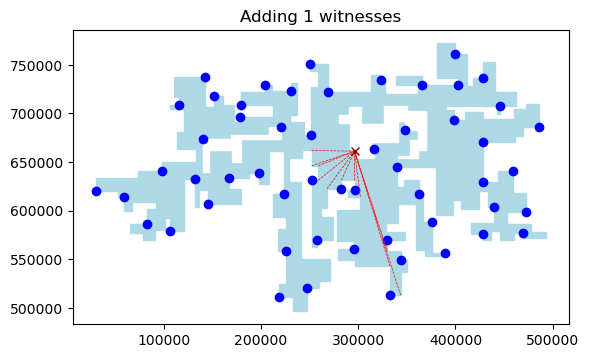

2023-11-24 16:01:19,535 Solving SAT-formula with timelimit 49.476792.
2023-11-24 16:01:19,536 SAT solver terminated (0.000000s).
2023-11-24 16:01:19,537 SAT-formula is satisfiable.
2023-11-24 16:01:19,537 Computing missing areas...


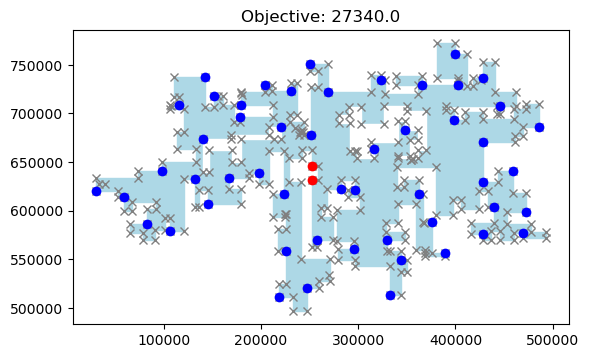

2023-11-24 16:01:21,309 Prohibited guard pair (263, 266).
2023-11-24 16:01:21,310 Prohibited guard pair (90, 92).
2023-11-24 16:01:21,311 Prohibited guard pair (239, 249).
2023-11-24 16:01:21,312 Prohibited guard pair (209, 293).
2023-11-24 16:01:21,314 Prohibited guard pair (262, 264).
2023-11-24 16:01:21,315 Prohibited guard pair (152, 154).
2023-11-24 16:01:21,316 Prohibited guard pair (139, 142).
2023-11-24 16:01:21,317 Prohibited guard pair (181, 183).
2023-11-24 16:01:21,318 Prohibited guard pair (24, 265).
2023-11-24 16:01:21,319 Prohibited guard pair (28, 33).
2023-11-24 16:01:21,320 Prohibited guard pair (64, 311).
2023-11-24 16:01:21,321 Prohibited guard pair (54, 62).
2023-11-24 16:01:21,322 Prohibited guard pair (118, 276).
2023-11-24 16:01:21,323 Prohibited guard pair (70, 285).
2023-11-24 16:01:21,325 Prohibited guard pair (16, 265).
2023-11-24 16:01:21,326 Prohibited guard pair (64, 313).
2023-11-24 16:01:21,327 Prohibited guard pair (75, 286).
2023-11-24 16:01:21,328 Pr

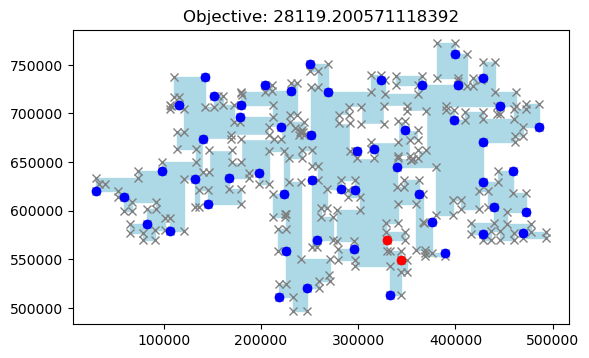

2023-11-24 16:01:22,839 Prohibited guard pair (61, 63).
2023-11-24 16:01:22,840 Prohibited guard pair (170, 174).
2023-11-24 16:01:22,840 Prohibited guard pair (196, 209).
2023-11-24 16:01:22,841 Prohibited guard pair (253, 255).
2023-11-24 16:01:22,842 Prohibited guard pair (23, 265).
2023-11-24 16:01:22,843 Prohibited guard pair (24, 262).
2023-11-24 16:01:22,843 Prohibited guard pair (179, 181).
2023-11-24 16:01:22,844 Prohibited guard pair (212, 215).
2023-11-24 16:01:22,845 Prohibited guard pair (68, 311).
2023-11-24 16:01:22,846 Prohibited guard pair (232, 237).
2023-11-24 16:01:22,847 Prohibited guard pair (249, 254).
2023-11-24 16:01:22,847 Prohibited guard pair (297, 298).
2023-11-24 16:01:22,848 Prohibited guard pair (38, 41).
2023-11-24 16:01:22,849 Prohibited guard pair (84, 191).
2023-11-24 16:01:22,851 Prohibited guard pair (307, 309).
2023-11-24 16:01:22,853 Prohibited guard pair (29, 31).
2023-11-24 16:01:22,854 Prohibited guard pair (197, 205).
2023-11-24 16:01:22,855 

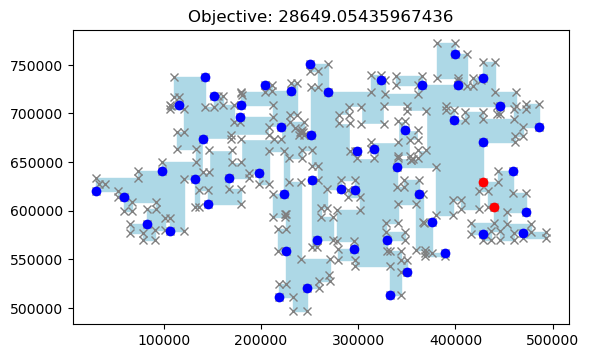

2023-11-24 16:01:24,449 Prohibited guard pair (159, 280).
2023-11-24 16:01:24,450 Prohibited guard pair (291, 294).
2023-11-24 16:01:24,451 Prohibited guard pair (39, 43).
2023-11-24 16:01:24,451 Prohibited guard pair (290, 291).
2023-11-24 16:01:24,452 Prohibited guard pair (125, 129).
2023-11-24 16:01:24,453 Prohibited guard pair (122, 149).
2023-11-24 16:01:24,453 Prohibited guard pair (64, 66).
2023-11-24 16:01:24,454 Prohibited guard pair (201, 203).
2023-11-24 16:01:24,455 Prohibited guard pair (283, 285).
2023-11-24 16:01:24,455 Prohibited guard pair (259, 263).
2023-11-24 16:01:24,456 Prohibited guard pair (235, 237).
2023-11-24 16:01:24,456 Prohibited guard pair (6, 11).
2023-11-24 16:01:24,457 Prohibited guard pair (275, 276).
2023-11-24 16:01:24,457 Prohibited guard pair (24, 260).
2023-11-24 16:01:24,458 Prohibited guard pair (149, 154).
2023-11-24 16:01:24,459 Prohibited guard pair (248, 250).
2023-11-24 16:01:24,460 Prohibited guard pair (121, 153).
2023-11-24 16:01:24,46

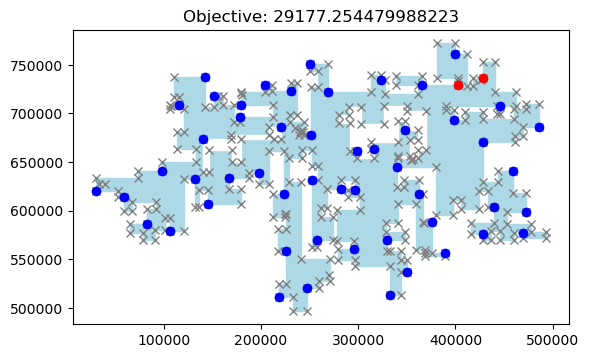

2023-11-24 16:01:25,907 Prohibited guard pair (127, 129).
2023-11-24 16:01:25,907 Prohibited guard pair (17, 264).
2023-11-24 16:01:25,908 Prohibited guard pair (296, 306).
2023-11-24 16:01:25,909 Prohibited guard pair (259, 262).
2023-11-24 16:01:25,910 Prohibited guard pair (100, 103).
2023-11-24 16:01:25,910 Prohibited guard pair (43, 56).
2023-11-24 16:01:25,911 Prohibited guard pair (85, 270).
2023-11-24 16:01:25,912 Prohibited guard pair (215, 237).
2023-11-24 16:01:25,913 Prohibited guard pair (150, 152).
2023-11-24 16:01:25,914 Prohibited guard pair (41, 311).
2023-11-24 16:01:25,915 Prohibited guard pair (101, 272).
2023-11-24 16:01:25,915 Prohibited guard pair (296, 298).
2023-11-24 16:01:25,916 Prohibited guard pair (91, 94).
2023-11-24 16:01:25,916 Solving SAT-formula with timelimit 58.149762.
2023-11-24 16:01:25,917 SAT solver terminated (0.000000s).
2023-11-24 16:01:25,918 SAT-formula is satisfiable.
2023-11-24 16:01:25,919 Computing missing areas...


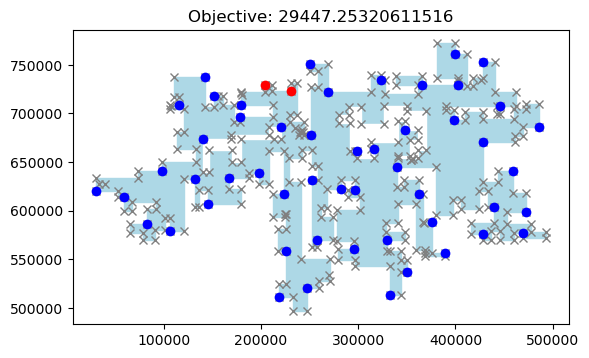

2023-11-24 16:01:27,402 Prohibited guard pair (240, 247).
2023-11-24 16:01:27,403 Prohibited guard pair (31, 35).
2023-11-24 16:01:27,404 Prohibited guard pair (85, 193).
2023-11-24 16:01:27,405 Prohibited guard pair (25, 39).
2023-11-24 16:01:27,405 Prohibited guard pair (282, 284).
2023-11-24 16:01:27,406 Prohibited guard pair (287, 290).
2023-11-24 16:01:27,407 Prohibited guard pair (27, 33).
2023-11-24 16:01:27,408 Prohibited guard pair (228, 232).
2023-11-24 16:01:27,408 Prohibited guard pair (169, 173).
2023-11-24 16:01:27,409 Prohibited guard pair (50, 56).
2023-11-24 16:01:27,410 Prohibited guard pair (113, 117).
2023-11-24 16:01:27,410 Prohibited guard pair (241, 245).
2023-11-24 16:01:27,411 Prohibited guard pair (255, 295).
2023-11-24 16:01:27,412 Solving SAT-formula with timelimit 59.645232.
2023-11-24 16:01:27,413 SAT solver terminated (0.000000s).
2023-11-24 16:01:27,414 SAT-formula is satisfiable.
2023-11-24 16:01:27,414 Computing missing areas...


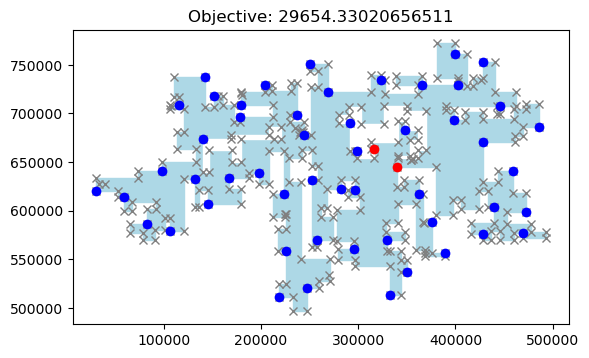

2023-11-24 16:01:28,827 Prohibited guard pair (89, 92).
2023-11-24 16:01:28,828 Prohibited guard pair (260, 264).
2023-11-24 16:01:28,829 Prohibited guard pair (197, 206).
2023-11-24 16:01:28,830 Prohibited guard pair (198, 205).
2023-11-24 16:01:28,831 Prohibited guard pair (204, 207).
2023-11-24 16:01:28,831 Prohibited guard pair (187, 188).
2023-11-24 16:01:28,832 Prohibited guard pair (254, 307).
2023-11-24 16:01:28,833 Prohibited guard pair (36, 40).
2023-11-24 16:01:28,833 Prohibited guard pair (301, 307).
2023-11-24 16:01:28,834 Prohibited guard pair (42, 63).
2023-11-24 16:01:28,835 Prohibited guard pair (20, 265).
2023-11-24 16:01:28,835 Prohibited guard pair (198, 209).
2023-11-24 16:01:28,836 Prohibited guard pair (7, 17).
2023-11-24 16:01:28,836 Prohibited guard pair (110, 113).
2023-11-24 16:01:28,837 Prohibited guard pair (179, 183).
2023-11-24 16:01:28,838 Solving SAT-formula with timelimit 61.071121.
2023-11-24 16:01:28,839 SAT solver terminated (0.000000s).
2023-11-24 

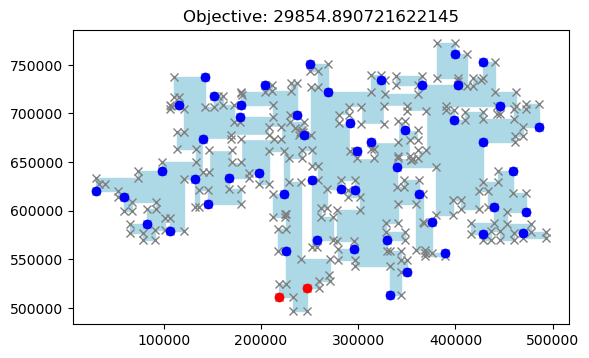

2023-11-24 16:01:30,204 Prohibited guard pair (160, 164).
2023-11-24 16:01:30,205 Prohibited guard pair (242, 247).
2023-11-24 16:01:30,205 Prohibited guard pair (241, 248).
2023-11-24 16:01:30,206 Prohibited guard pair (224, 225).
2023-11-24 16:01:30,207 Prohibited guard pair (102, 105).
2023-11-24 16:01:30,208 Prohibited guard pair (294, 298).
2023-11-24 16:01:30,209 Prohibited guard pair (52, 55).
2023-11-24 16:01:30,209 Prohibited guard pair (284, 286).
2023-11-24 16:01:30,211 Prohibited guard pair (177, 188).
2023-11-24 16:01:30,211 Prohibited guard pair (3, 7).
2023-11-24 16:01:30,212 Prohibited guard pair (210, 294).
2023-11-24 16:01:30,213 Prohibited guard pair (165, 271).
2023-11-24 16:01:30,214 Prohibited guard pair (241, 244).
2023-11-24 16:01:30,215 Prohibited guard pair (210, 292).
2023-11-24 16:01:30,215 Prohibited guard pair (296, 307).
2023-11-24 16:01:30,216 Prohibited guard pair (226, 228).
2023-11-24 16:01:30,218 Prohibited guard pair (1, 6).
2023-11-24 16:01:30,219 

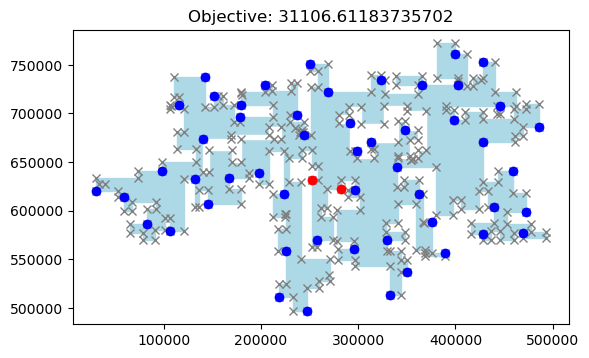

2023-11-24 16:01:31,786 Prohibited guard pair (156, 159).
2023-11-24 16:01:31,786 Prohibited guard pair (142, 146).
2023-11-24 16:01:31,787 Prohibited guard pair (209, 291).
2023-11-24 16:01:31,788 Prohibited guard pair (103, 274).
2023-11-24 16:01:31,789 Prohibited guard pair (165, 269).
2023-11-24 16:01:31,789 Prohibited guard pair (0, 6).
2023-11-24 16:01:31,790 Prohibited guard pair (246, 247).
2023-11-24 16:01:31,791 Prohibited guard pair (37, 40).
2023-11-24 16:01:31,791 Prohibited guard pair (44, 55).
2023-11-24 16:01:31,792 Prohibited guard pair (108, 109).
2023-11-24 16:01:31,793 Prohibited guard pair (6, 265).
2023-11-24 16:01:31,793 Prohibited guard pair (306, 309).
2023-11-24 16:01:31,794 Prohibited guard pair (85, 194).
2023-11-24 16:01:31,795 Prohibited guard pair (58, 63).
2023-11-24 16:01:31,796 Solving SAT-formula with timelimit 64.028987.
2023-11-24 16:01:31,797 SAT solver terminated (0.000000s).
2023-11-24 16:01:31,798 SAT-formula is satisfiable.
2023-11-24 16:01:31,

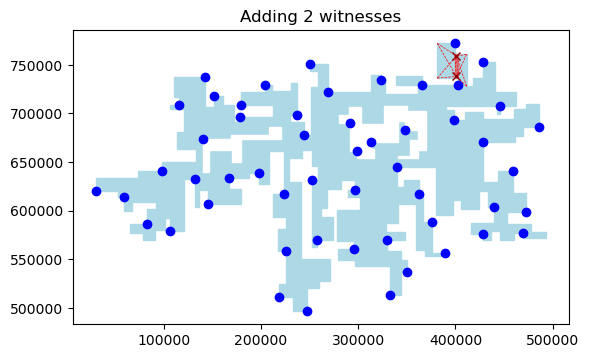

2023-11-24 16:01:32,687 Solving SAT-formula with timelimit 63.137773.
2023-11-24 16:01:32,688 SAT solver terminated (0.000000s).
2023-11-24 16:01:32,689 SAT-formula is satisfiable.
2023-11-24 16:01:32,689 Computing missing areas...


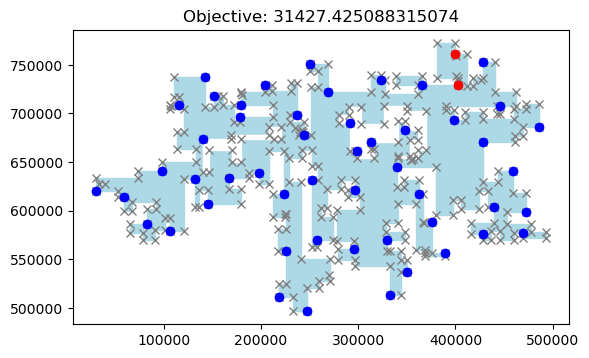

2023-11-24 16:01:34,126 Prohibited guard pair (303, 307).
2023-11-24 16:01:34,126 Prohibited guard pair (121, 154).
2023-11-24 16:01:34,127 Prohibited guard pair (10, 17).
2023-11-24 16:01:34,128 Prohibited guard pair (200, 204).
2023-11-24 16:01:34,129 Prohibited guard pair (216, 217).
2023-11-24 16:01:34,130 Prohibited guard pair (2, 266).
2023-11-24 16:01:34,131 Solving SAT-formula with timelimit 66.364184.
2023-11-24 16:01:34,132 SAT solver terminated (0.000000s).
2023-11-24 16:01:34,133 SAT-formula is satisfiable.
2023-11-24 16:01:34,133 Computing missing areas...
2023-11-24 16:01:34,591 Adding witnesses to missing areas...
2023-11-24 16:01:34,596 Added coverage constraint for 9 vertices.
2023-11-24 16:01:34,600 Added coverage constraint for 8 vertices.


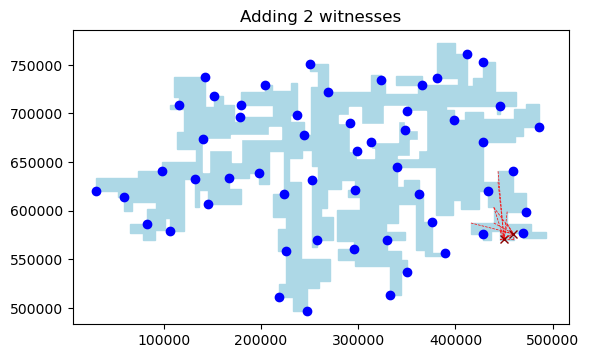

2023-11-24 16:01:35,016 Solving SAT-formula with timelimit 65.479108.
2023-11-24 16:01:35,017 SAT solver terminated (0.000000s).
2023-11-24 16:01:35,018 SAT-formula is satisfiable.
2023-11-24 16:01:35,018 Computing missing areas...


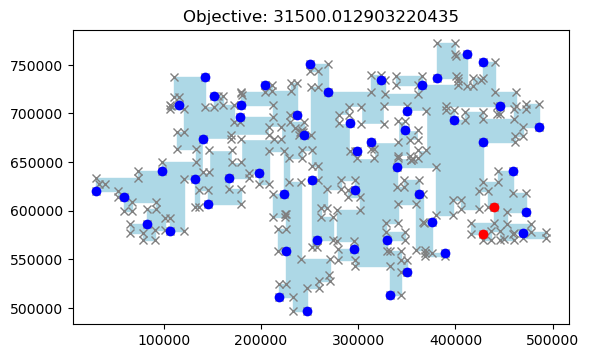

2023-11-24 16:01:36,598 Prohibited guard pair (124, 128).
2023-11-24 16:01:36,598 Prohibited guard pair (45, 49).
2023-11-24 16:01:36,599 Prohibited guard pair (16, 18).
2023-11-24 16:01:36,600 Prohibited guard pair (87, 92).
2023-11-24 16:01:36,600 Prohibited guard pair (180, 185).
2023-11-24 16:01:36,601 Prohibited guard pair (83, 270).
2023-11-24 16:01:36,602 Prohibited guard pair (209, 214).
2023-11-24 16:01:36,603 Prohibited guard pair (159, 162).
2023-11-24 16:01:36,603 Solving SAT-formula with timelimit 68.836650.
2023-11-24 16:01:36,604 SAT solver terminated (0.000000s).
2023-11-24 16:01:36,605 SAT-formula is satisfiable.
2023-11-24 16:01:36,606 Computing missing areas...


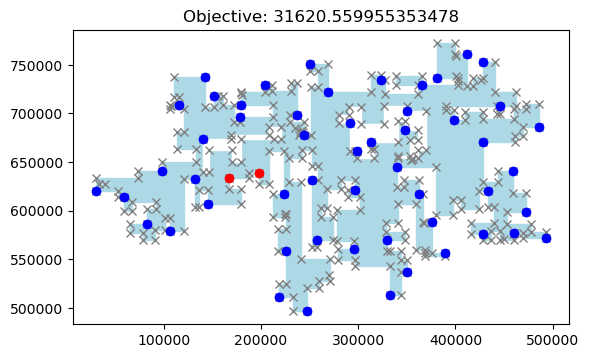

2023-11-24 16:01:38,090 Prohibited guard pair (297, 306).
2023-11-24 16:01:38,091 Prohibited guard pair (43, 62).
2023-11-24 16:01:38,092 Prohibited guard pair (86, 193).
2023-11-24 16:01:38,092 Prohibited guard pair (98, 273).
2023-11-24 16:01:38,093 Prohibited guard pair (255, 309).
2023-11-24 16:01:38,094 Prohibited guard pair (73, 282).
2023-11-24 16:01:38,095 Prohibited guard pair (76, 287).
2023-11-24 16:01:38,096 Prohibited guard pair (38, 42).
2023-11-24 16:01:38,097 Prohibited guard pair (90, 98).
2023-11-24 16:01:38,098 Prohibited guard pair (224, 226).
2023-11-24 16:01:38,098 Prohibited guard pair (10, 267).
2023-11-24 16:01:38,099 Prohibited guard pair (86, 91).
2023-11-24 16:01:38,100 Prohibited guard pair (140, 146).
2023-11-24 16:01:38,100 Prohibited guard pair (94, 96).
2023-11-24 16:01:38,101 Prohibited guard pair (210, 215).
2023-11-24 16:01:38,102 Prohibited guard pair (104, 274).
2023-11-24 16:01:38,102 Prohibited guard pair (194, 197).
2023-11-24 16:01:38,103 Prohi

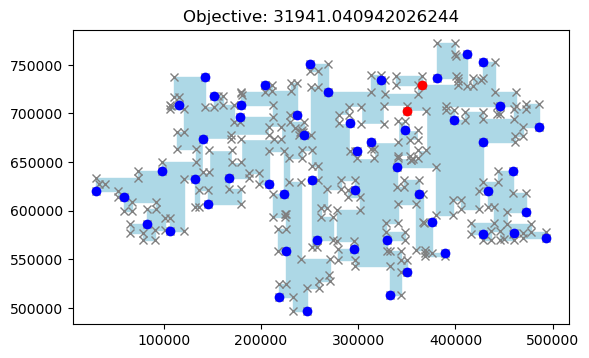

2023-11-24 16:01:40,073 Prohibited guard pair (76, 79).
2023-11-24 16:01:40,074 Prohibited guard pair (278, 280).
2023-11-24 16:01:40,074 Prohibited guard pair (17, 23).
2023-11-24 16:01:40,075 Prohibited guard pair (86, 273).
2023-11-24 16:01:40,076 Prohibited guard pair (92, 96).
2023-11-24 16:01:40,077 Prohibited guard pair (195, 207).
2023-11-24 16:01:40,077 Prohibited guard pair (123, 134).
2023-11-24 16:01:40,078 Prohibited guard pair (67, 69).
2023-11-24 16:01:40,079 Prohibited guard pair (198, 206).
2023-11-24 16:01:40,080 Prohibited guard pair (307, 310).
2023-11-24 16:01:40,080 Prohibited guard pair (35, 36).
2023-11-24 16:01:40,081 Prohibited guard pair (2, 9).
2023-11-24 16:01:40,082 Solving SAT-formula with timelimit 72.315218.
2023-11-24 16:01:40,083 SAT solver terminated (0.000000s).
2023-11-24 16:01:40,084 SAT-formula is satisfiable.
2023-11-24 16:01:40,084 Computing missing areas...
2023-11-24 16:01:40,748 Adding witnesses to missing areas...
2023-11-24 16:01:40,753 Ad

KeyboardInterrupt: 

In [6]:
import logging

# logging.basicConfig(level=logging.INFO)
logger = logging.getLogger("DispAGP")
logger.setLevel(logging.DEBUG)

# time stamps
if not logger.hasHandlers():
    logging_handler = logging.StreamHandler()
    logging_handler.setFormatter(logging.Formatter("%(asctime)s %(message)s"))
    logger.addHandler(logging_handler)

logger.info("Test")

solver = DispAgpSolver(instance, logger=logger)
solver.observer = MyObserbver(instance, "example_iterations", "png")
solver.optimize()


print("Guards", solver.guards, "Distance", solver.objective)

In [ ]:
solver.get_statistics()

[{'num_guards': 314,
  'objective': 15800000.0,
  'feasible': True,
  'sat_stats': [{'num_guards': 41,
    'num_witnesses': 314,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 1,
     'conflicts': 0,
     'decisions': 275,
     'propagations': 315,
     'num_coverage_constraints': 314,
     'num_prohibited_guards': 0},
    'remaining_time': 899.5817675590515,
    'num_missing_areas': 10},
   {'num_guards': 49,
    'num_witnesses': 324,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 2,
     'conflicts': 0,
     'decisions': 547,
     'propagations': 630,
     'num_coverage_constraints': 324,
     'num_prohibited_guards': 0},
    'remaining_time': 898.382798910141,
    'num_missing_areas': 2},
   {'num_guards': 51,
    'num_witnesses': 326,
    'num_prohibited_pairs': 0,
    'feasible': True,
    'sat_stats': {'restarts': 3,
     'conflicts': 0,
     'decisions': 820,
     'propagations': 945,
     'num_coverage_cons

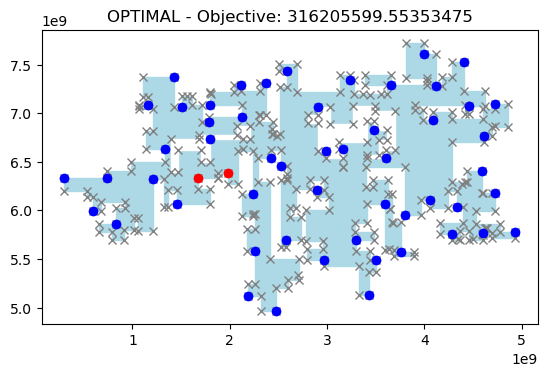

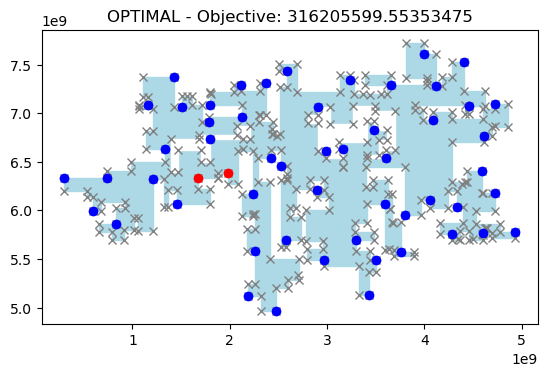

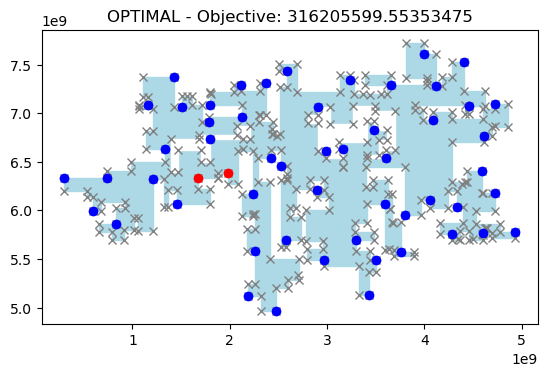

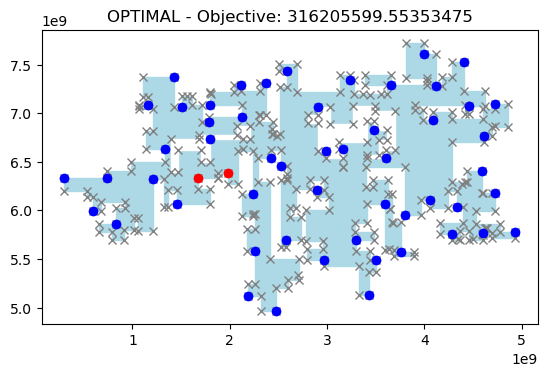

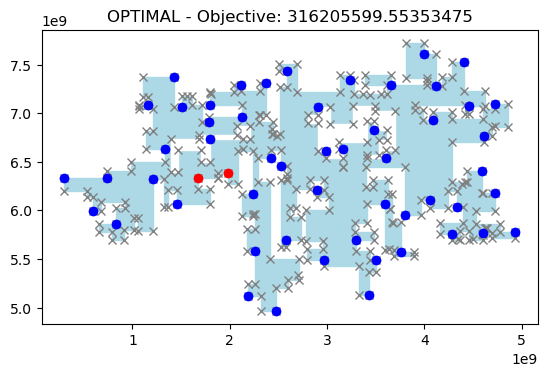

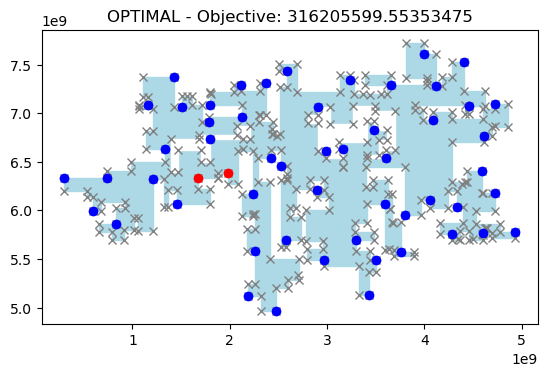

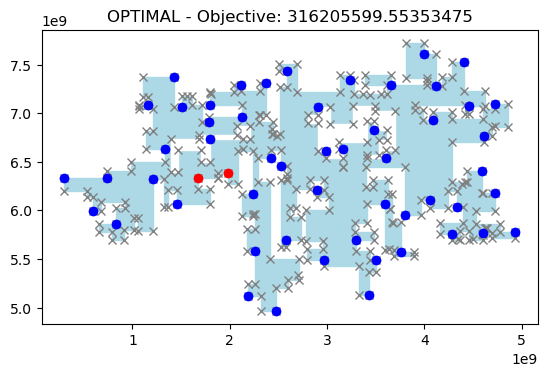

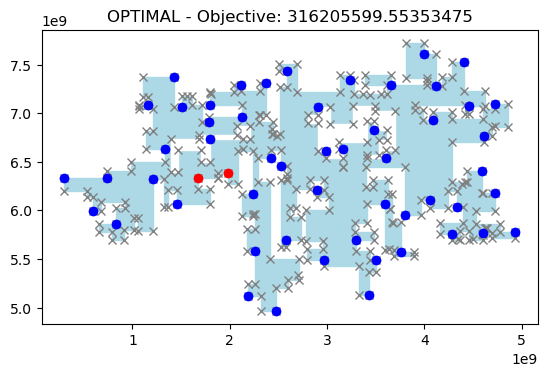

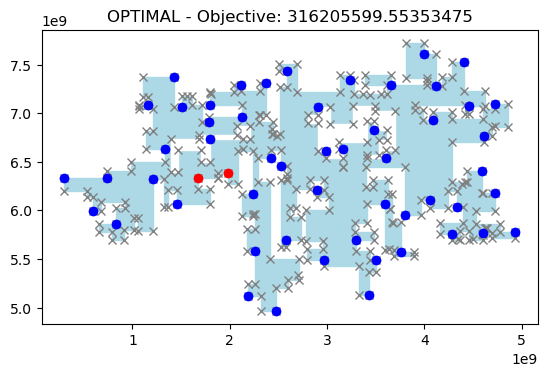

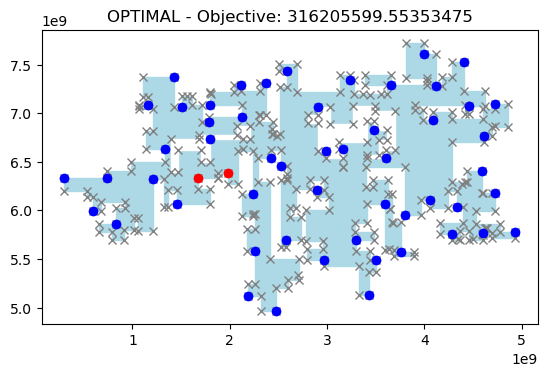

In [ ]:
for i in range(10):
    solver.observer.plot_last_solution()